In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
%matplotlib inline

import os
print(os.listdir())

['.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', 'anaconda3', 'AppData', 'Application Data', 'beer.csv', 'beer1.csv', 'beer2.csv', 'Cluster Data Using K-means Algorithm - Self-Study Assignment 6.1.ipynb', 'Cluster Standardised Data Self-Study Assignment 6.2.txt', 'clustering1_demo1.ipynb', 'clustering1_demo2.ipynb', 'clustering1_demo3.ipynb', 'clustering1_demo4.ipynb', 'clustering1_demo5.ipynb', 'clustering1_demo6.ipynb', 'clustering1_demo7.ipynb', 'clustering1_demo8.ipynb', 'clustering2_demo1.ipynb', 'clustering2_demo2.ipynb', 'Contacts', 'Cookies', 'Creating Product Segments - Beer.ipynb', 'Creating Product Segments.ipynb', 'Dataset.csv', 'data_clustering Self Assignment 6.1.txt', 'data_clustering.txt', 'data_quality.txt', 'Dendrogram and Elbow Curve Using Beer Data .ipynb', 'Documents', 'Downloads', 'Estimate the Quality of Clustering.ipynb', 'Favorites', 'Find the Cluster Centres of Data Segments.ipy

In [3]:
dataset = pd.read_csv("Heart Disease Data.csv")
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
dataset.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
dataset.shape

(303, 14)

In [12]:
dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1-> Defective Heart
0-> Healthy Heart

In [14]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

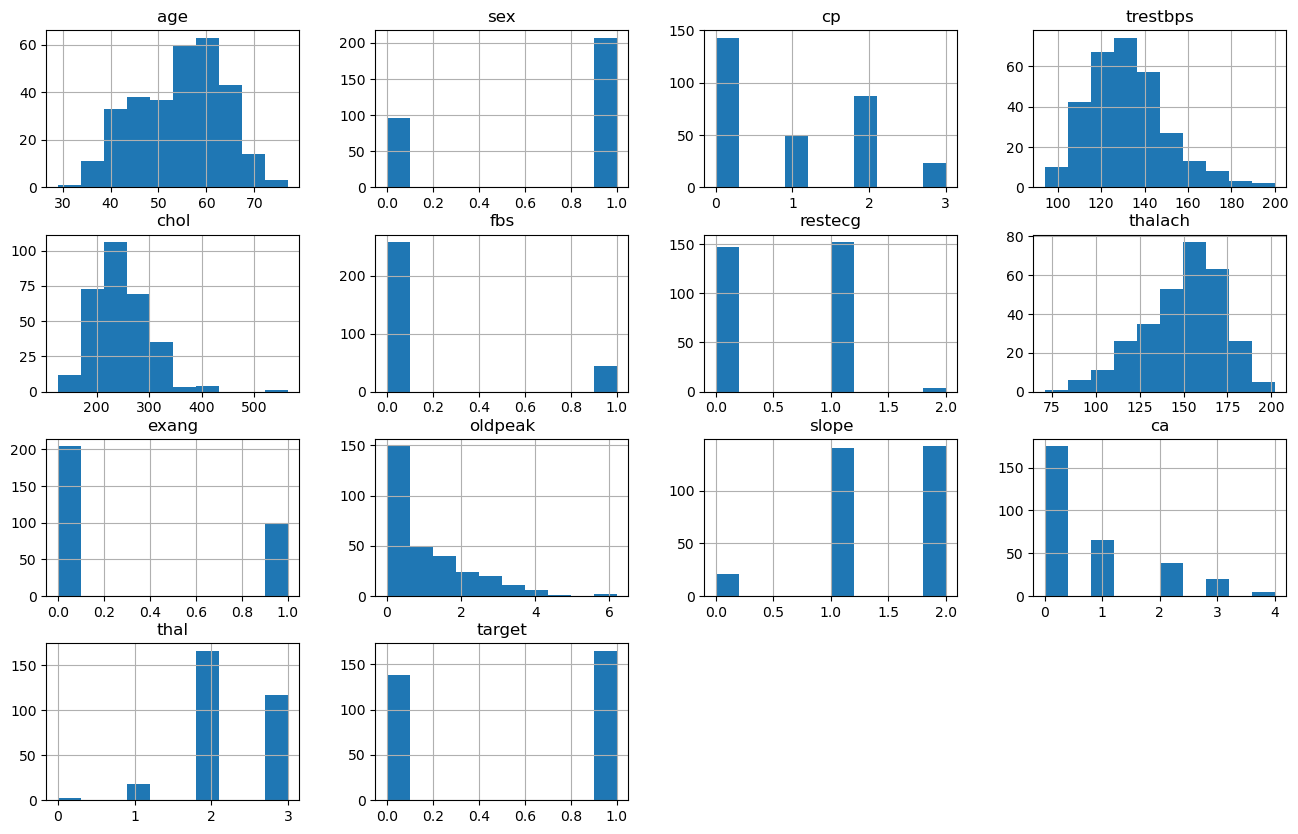

In [15]:
# draw histogram of the features 
hist = dataset.hist(bins=10, figsize=(16,10))

Age max: 77  min: 29


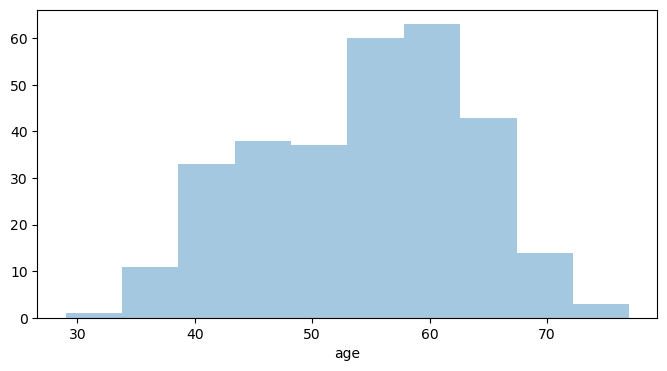

In [17]:
#What is the age distribution on this dataset?
plt.figure(figsize=(8,4))
sns.distplot(dataset['age'],kde=False,bins=10)
print ("Age max:", dataset['age'].max(), " min:", dataset['age'].min())

([<matplotlib.patches.Wedge at 0x21ebc00a650>,
 [Text(1.0472941106630544, -0.5858114421641848, 'fasting blood sugar < 120 mg/dl'),
  Text(-0.9600196014411332, 0.5369938219838362, 'fasting blood sugar > 120 mg/dl')],
 [Text(0.6109215645534483, -0.34172334126244114, '83.8%'),
  Text(-0.5236470553315271, 0.29290572108209245, '16.2%')])

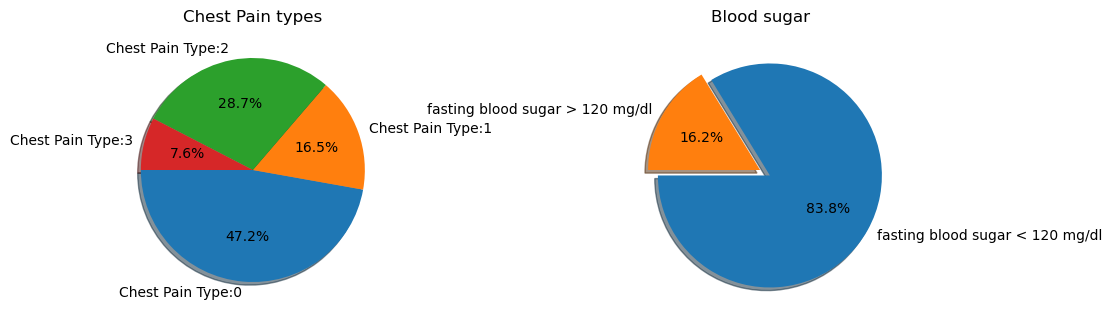

In [18]:
#How many people has chest pain and high blood sugar?
plt.figure(figsize=(12,8))
# Chest Pain
plt.subplot(221)
plt.title("Chest Pain types")
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(dataset[dataset['cp'] == 0]),len(dataset[dataset['cp'] == 1]),
         len(dataset[dataset['cp'] == 2]),len(dataset[dataset['cp'] == 3])]
plt.pie(sizes, explode=(0, 0,0,0), labels=labels,autopct='%1.1f%%', shadow=True, startangle=180)
# blood sugar
plt.subplot(222)    
plt.title("Blood sugar")
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(dataset[dataset['fbs'] == 0]),len(dataset[dataset['cp'] == 1])]
plt.pie(sizes, explode=(0.1, 0), labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)

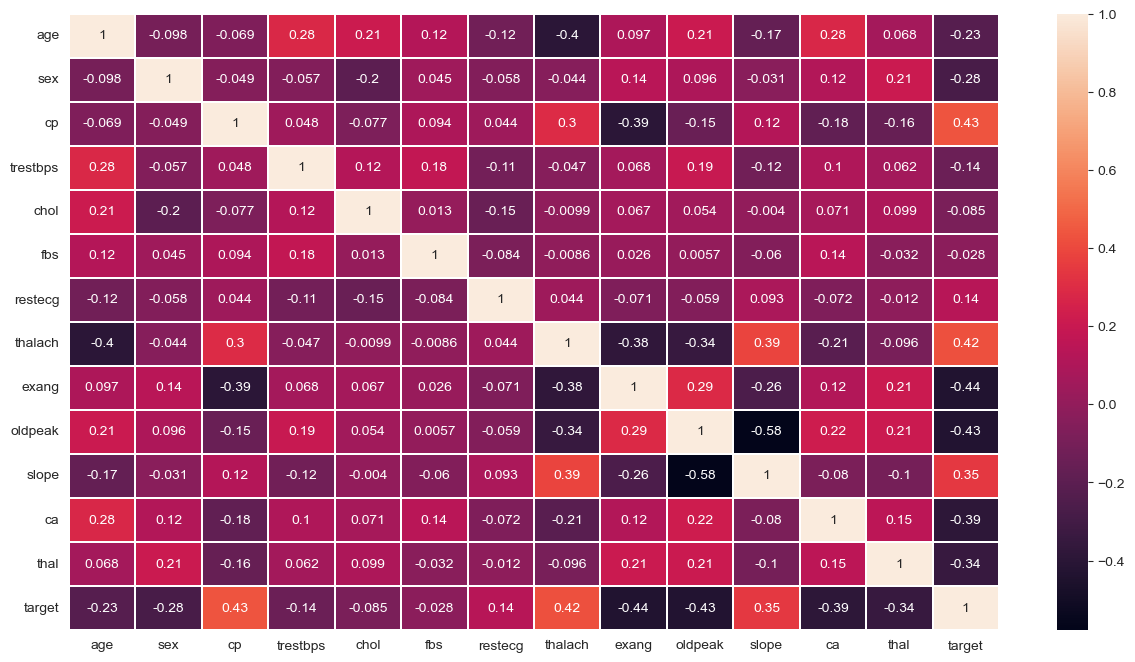

In [19]:
#Is there any correlation between features? 
# draw a heatmap
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot = True, linewidths=.2)
plt.show()

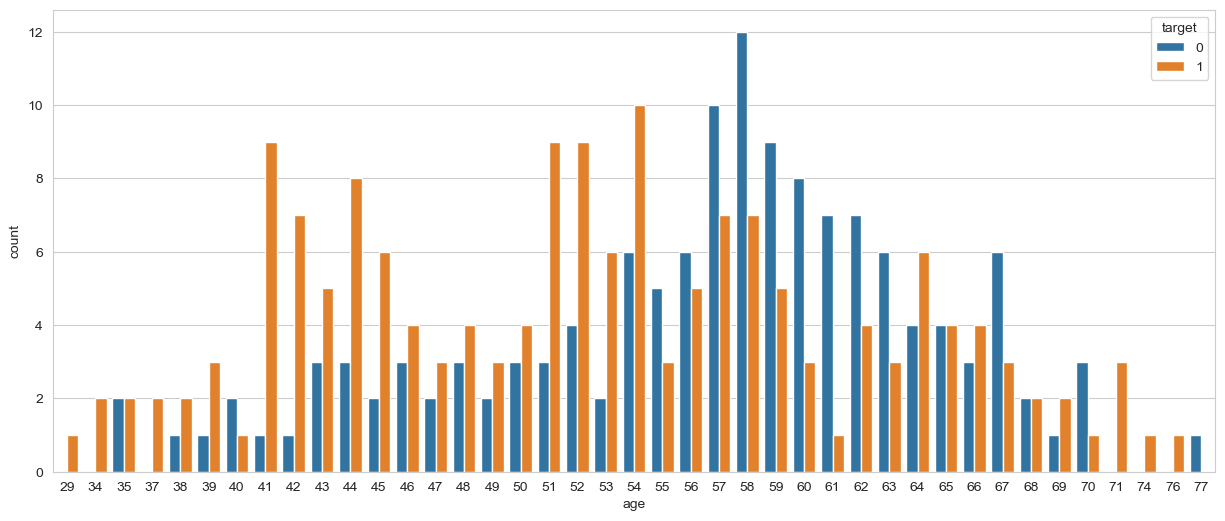

In [58]:
#Which age has high risk of heat disase?
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = dataset, hue = 'target')
plt.show()

In [24]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
X=dataset.drop(columns='target',axis=1)
Y=dataset['target']

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

In [35]:
X_train.shape

(242, 13)

In [37]:
model = LogisticRegression ()

In [38]:
model.fit(X_train, Y_train)

LogisticRegression()

In [39]:
X_train_prediction = model.predict (X_train)
training_dataset_acc = accuracy_score(X_train_prediction, Y_train)

In [41]:
#Training Data Accuracy
training_dataset_acc

0.8512396694214877

In [59]:
#Training model has 85% accuracy

In [43]:
X_test_prediction = model.predict (X_test)
test_dataset_acc = accuracy_score(X_test_prediction, Y_test)

In [44]:
#Test Data Accuracy
test_dataset_acc

0.819672131147541

In [45]:
#Hence, Test model has close to 82% accuracy

In [46]:
# Predictive Model
input_data = (37,1,2,130,250,0,1,187,0,3.5,0,0,2)

df_array = np.asarray(input_data)

reshape_data = df_array.reshape(1,-1)

prediction = model.predict(reshape_data)

In [48]:
prediction[0]

1

In [53]:
if prediction [0]==1:
    print("Patient has defective heart")
else:
    print("Patient has healthy heart")

Patient has defective heart
